PANDAS GROUP BY: https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb


Info Links: https://code.visualstudio.com/docs/python/jupyter-support  
https://stackoverflow.com/questions/35226904/convert-spanish-date-in-string-format  
https://stackabuse.com/how-to-format-dates-in-python/  
Dateparser docs:https://dateparser.readthedocs.io/en/latest/  

Threads:https://stackoverflow.com/questions/34386561/pyqt-not-responding  
Thread and return:https://stackoverflow.com/questions/6893968/how-to-get-the-return-value-from-a-thread-in-python 


Tuto threads:http://www.laurentluce.com/posts/python-threads-synchronization-locks-rlocks-semaphores-conditions-events-and-queues/  
Threads PyQT5: https://stackoverflow.com/questions/42357656/pyqt5-timers-cannot-be-started-from-another-thread-error-when-changing-size-of


RESPUESTA FINAL: https://stackoverflow.com/questions/42357656/pyqt5-timers-cannot-be-started-from-another-thread-error-when-changing-size-of


Problema cierre de ventanas por que los recolecta pa basura: https://www.reddit.com/r/Python/comments/7cml65/pyqt_second_screen_closes_immediately/

PyQT COMPORTAMIENTO:https://doc.qt.io/archives/qt-4.8/qapplication.html#lastWindowClosed


## Imports the necessary libraries

In [25]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

UsageError: Line magic function `%install_ext` not found.


In [2]:
import os
import pandas as pd
import numpy as np


In [74]:
# Gets all the files from the dir
baseDir = r"C:\\Users\\robin\\Google Drive\\WORK\\ExcelsStuff\\files\\nuevos"
fileNames = []
for filename in os.listdir(baseDir):
    if(filename.startswith('~$')):
        continue
    fileNames.append(filename)
fileNames

['Lista Enero 12.xlsx',
 'Lista Enero 13.xlsx',
 'Lista Enero 14.xlsx',
 'Lista Enero 15.xlsx']

In [3]:
# Gets all the files from the dir
baseDir = r"C:\\Users\\robin\\Google Drive\\WORK\\ExcelsStuff\\files\\nuevos"
fileNames = []
for filename in os.listdir(baseDir):
    if(filename.startswith('~$')):
        continue
    fileNames.append(filename)
fileNames

['Lista Enero 12.xlsx',
 'Lista Enero 13.xlsx',
 'Lista Enero 14.xlsx',
 'Lista Enero 15.xlsx']

## Reads each excel file and saves all the sheets into a list with the specified columns

In [3]:

dfs = []
COLS = ["RAT","OPERATOR","CHANNEL","IMEI","IMSI","TMSI",
        "MS POWER","TA","LAST LAC","NAME","HITS","DATE-TIME"]
for filename in fileNames:
    # dfs.append(pd.read_excel(f"{baseDir}\\{filename}"))
    temd_dfs = [pd.read_excel(f"{baseDir}\\{filename}", sheet_name=0, usecols=COLS), #2G
                pd.read_excel(f"{baseDir}\\{filename}", sheet_name=1, usecols=COLS), #3G
                pd.read_excel(f"{baseDir}\\{filename}", sheet_name=2, usecols=COLS)] #4G
    dfs.append(temd_dfs)
len(dfs)

2

In [4]:
# NUEVO
dfs = []
COLS = ["RAT", "OPERATOR", "CHANNEL", "IMEI", "IMSI", "TMSI",
        "MS POWER", "TA", "LAST LAC", "NAME", "HITS", "DATE-TIME"]
for filePath in fileNames:
    temd_df = pd.read_excel(f"{baseDir}\\{filePath}", usecols=COLS)
    dfs.append(temd_df)
len(dfs)

4

In [3]:
# Archivo de prueba
dire = 'C:\\Users\\robin\\Google Drive\\WORK\\ExcelsStuff\\files\\Dic312019.xlsx'
allData = pd.read_excel(dire)

In [4]:
allData

,RAT,BL/WL,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS POWER,TA,LAST LAC,MODEL,LATTITUDE,LONGITUDE,NAME,NOTES,HITS,DATE-TIME
0,2G,WL,EC-Claro(América Móvil)-01,144,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,65534,UNKNOWN,0,0,NaN,NaN,1,mi. ene. 1 03:05:16 2020
1,2G,WL,EC-Claro(América Móvil)-01,144,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,65534,UNKNOWN,0,0,NaN,NaN,1,mi. ene. 1 03:04:51 2020
2,2G,WL,EC-Claro(América Móvil)-01,144,7.400102e+14,8.636970e+14,151D1A53,-66.0,0,50134,UNKNOWN,0,0,NaN,NaN,1,mi. ene. 1 02:55:06 2020
3,2G,WL,EC-Claro(América Móvil)-01,144,7.400101e+14,3.570841e+14,97155956,-62.0,0,10228,UNKNOWN,0,0,NaN,NaN,1,mi. ene. 1 02:54:44 2020
4,2G,WL,EC-Claro(América Móvil)-01,144,7.400102e+14,3.580991e+14,FFFFFFFF,-64.0,0,65534,UNKNOWN,0,0,NaN,NaN,1,mi. ene. 1 02:37:15 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,4G,WL,EC-Movistar(Telefónica)-00,700,7.400002e+14,NaN,NaN,-110147.0,2,9616,UNKNOWN,0,0,NaN,NaN,3,ma. dic. 31 12:20:57 2019
2200,4G,WL,EC-Movistar(Telefónica)-00,700,7.400001e+14,NaN,NaN,-115382.0,2,-1,UNKNOWN,0,0,NaN,NaN,1,ma. dic. 31 08:07:56 2019
2201,4G,WL,EC-Movistar(Telefónica)-00,700,7.400051e+14,NaN,NaN,-109835.0,2,9616,UNKNOWN,0,0,NaN,NaN,1,ma. dic. 31 08:07:31 2019
2202,4G,WL,EC-Movistar(Telefónica)-00,700,7.400002e+14,NaN,NaN,-107257.0,2,9616,UNKNOWN,0,0,NaN,NaN,1,ma. dic. 31 08:07:22 2019


In [5]:
allData = pd.concat(dfs)
allData.dropna(how='all', inplace=True)
allData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42711 entries, 0 to 13914
Data columns (total 12 columns):
RAT          42711 non-null object
OPERATOR     42711 non-null object
CHANNEL      42711 non-null float64
IMSI         42546 non-null float64
IMEI         40032 non-null object
TMSI         40035 non-null object
MS POWER     42711 non-null object
TA           42711 non-null object
LAST LAC     42711 non-null float64
NAME         3 non-null float64
HITS         42678 non-null float64
DATE-TIME    42708 non-null object
dtypes: float64(5), object(7)
memory usage: 4.2+ MB


In [6]:
# Renaming columns
cols = allData.columns
cols = cols.map(lambda x: x.strip().replace(' ', '_').strip() if isinstance(x, (str, )) else x)
allData.columns = cols

In [93]:
allData.head()

,RAT,BL/WL,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,MODEL,LATTITUDE,LONGITUDE,NAME,NOTES,HITS,DATE-TIME
0,2G,WL,EC-Claro(América Móvil)-01,144,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,65534,UNKNOWN,0,0,NaN,NaN,1,mi. ene. 1 03:05:16 2020
1,2G,WL,EC-Claro(América Móvil)-01,144,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,65534,UNKNOWN,0,0,NaN,NaN,1,mi. ene. 1 03:04:51 2020
2,2G,WL,EC-Claro(América Móvil)-01,144,7.400102e+14,8.636970e+14,151D1A53,-66.0,0,50134,UNKNOWN,0,0,NaN,NaN,1,mi. ene. 1 02:55:06 2020
3,2G,WL,EC-Claro(América Móvil)-01,144,7.400101e+14,3.570841e+14,97155956,-62.0,0,10228,UNKNOWN,0,0,NaN,NaN,1,mi. ene. 1 02:54:44 2020
4,2G,WL,EC-Claro(América Móvil)-01,144,7.400102e+14,3.580991e+14,FFFFFFFF,-64.0,0,65534,UNKNOWN,0,0,NaN,NaN,1,mi. ene. 1 02:37:15 2020


### Returns a datetime object from a string representation

In [44]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
RAT          48 non-null object
BL/WL        48 non-null object
OPERATOR     48 non-null object
CHANNEL      48 non-null float64
IMSI         47 non-null float64
IMEI         46 non-null float64
TMSI         48 non-null object
MS_POWER     48 non-null float64
TA           48 non-null float64
LAST_LAC     48 non-null object
MODEL        0 non-null float64
LATTITUDE    0 non-null float64
LONGITUDE    0 non-null float64
NAME         0 non-null float64
NOTES        0 non-null float64
HITS         47 non-null float64
DATE-TIME    48 non-null object
dtypes: float64(11), object(6)
memory usage: 6.8+ KB


In [7]:
def getMonthInt(strMonth):
    if(strMonth.lower() in ["ene"]):
        return 1
    elif(strMonth.lower() in ["feb"]):
        return 2
    elif(strMonth.lower() in ["mar"]):
        return 3
    elif(strMonth.lower() in ["abr"]):
        return 4
    elif(strMonth.lower() in ["may"]):
        return 5
    elif(strMonth.lower() in ["jun"]):
        return 6
    elif(strMonth.lower() in ["jul"]):
        return 7
    elif(strMonth.lower() in ["ago"]):
        return 8
    elif(strMonth.lower() in ["sep"]):
        return 9
    elif(strMonth.lower() in ["oct"]):
        return 10
    elif(strMonth.lower() in ["nov"]):
        return 11
    elif(strMonth.lower() in ["dic"]):
        return 12

def toDatetime(dateStr):
    try:
        # Date string example-> ma. dic. 31 23:50:11 2019
        _, month,t_year = list(map(str.strip, dateStr.split('.')))
        day, t, year = t_year.split(' ') 
        month = getMonthInt(month)
        dateStr = f"{year}-{month}-{day} {t}"
        return pd.to_datetime(dateStr, format="%Y-%m-%d %X")
    except Exception:
        return np.NaN
result = toDatetime("ma. dic. 31 08:07:30 2019")
print(result)
type(result)

2019-12-31 08:07:30


pandas._libs.tslibs.timestamps.Timestamp

In [8]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42711 entries, 0 to 13914
Data columns (total 12 columns):
RAT          42711 non-null object
OPERATOR     42711 non-null object
CHANNEL      42711 non-null float64
IMSI         42546 non-null float64
IMEI         40032 non-null object
TMSI         40035 non-null object
MS_POWER     42711 non-null object
TA           42711 non-null object
LAST_LAC     42711 non-null float64
NAME         3 non-null float64
HITS         42678 non-null float64
DATE-TIME    42708 non-null object
dtypes: float64(5), object(7)
memory usage: 4.2+ MB


In [9]:
# Pone NaN cuando no puede
allData['DATE_TIME'] = allData['DATE-TIME'].apply(toDatetime)
allData.head(2)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE-TIME,DATE_TIME
0,2G,EC-Movistar(Telefónica)-00,245.0,2.040433e+14,356612024675599,1F41825D,-72,0,15251.0,NaN,2.0,do. ene. 12 17:06:33 2020,2020-01-12 17:06:33
1,2G,EC-Movistar(Telefónica)-00,245.0,2.040808e+14,353068098714504,FFFFFFFF,-79,0,15251.0,NaN,1.0,do. ene. 12 16:26:39 2020,2020-01-12 16:26:39


In [10]:
# Convierte MSP_POWER a numeric o ponen NAN
allData['MS_POWER'] = pd.to_numeric(allData['MS_POWER'], errors='coerce')

In [11]:
allData[allData['MS_POWER'].isnull()]

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE-TIME,DATE_TIME
186,2G,EC-Claro(América Móvil)-01,140.0,7.400102e+14,1.405e+13,14253007522278,NaN,-82,0.0,NaN,NaN,1,NaT
3204,3G,EC-Movistar(Telefónica)-00,512.0,7.400102e+14,3.53415e+14,867265033931487,NaN,-110,3.0,NaN,NaN,1,NaT
4516,2G,EC-Claro(América Móvil)-01,140.0,7.400202e+14,3.54452e+14,864893033923536,NaN,-76,0.0,NaN,NaN,1,NaT
7296,2G,EC-Claro(América Móvil)-01,140.0,7.400102e+14,3.56812e+14,356813071928978,NaN,-84,0.0,NaN,NaN,1,NaT
7299,3G,EC-Movistar(Telefónica)-00,4412.0,7.400102e+14,3.56812e+14,356813071988956,NaN,-105,3.0,NaN,NaN,1,NaT
9852,3G,EC-Movistar(Telefónica)-00,512.0,7.400202e+14,3.58517e+14,357185053125140,NaN,-111,3.0,NaN,NaN,1,NaT
11518,3G,EC-Movistar(Telefónica)-00,512.0,7.400102e+14,7.4e+14,356812071988958,NaN,-111,3.0,NaN,NaN,1,NaT
11521,3G,EC-Claro(América Móvil)-01,4387.0,7.400102e+14,7.4e+14,867903032596964,NaN,-91,2.0,NaN,NaN,1,NaT
11522,3G,EC-Movistar(Telefónica)-00,512.0,7.400002e+14,7.4e+14,352765092097759,NaN,-107,4.0,NaN,NaN,1,NaT
11523,3G,EC-Movistar(Telefónica)-00,512.0,7.400001e+14,7.40005e+14,354728081477554,NaN,-113,4.0,NaN,NaN,1,NaT


In [12]:
allData.drop('DATE-TIME', axis=1, inplace=True)
allData

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
0,2G,EC-Movistar(Telefónica)-00,245.0,2.040433e+14,356612024675599,1F41825D,-72.0,0,15251.0,NaN,2.0,2020-01-12 17:06:33
1,2G,EC-Movistar(Telefónica)-00,245.0,2.040808e+14,353068098714504,FFFFFFFF,-79.0,0,15251.0,NaN,1.0,2020-01-12 16:26:39
2,2G,EC-Claro(América Móvil)-01,136.0,2.140329e+14,357955087983593,700A80E9,-88.0,0,50134.0,NaN,1.0,2020-01-12 18:54:47
3,2G,EC-Movistar(Telefónica)-00,245.0,2.140366e+14,869328032037298,16231F0D,-77.0,0,15251.0,NaN,1.0,2020-01-12 10:51:06
4,2G,EC-Movistar(Telefónica)-00,245.0,2.140606e+14,358794102465313,FFFFFFFF,-83.0,0,65534.0,NaN,1.0,2020-01-12 11:36:16
...,...,...,...,...,...,...,...,...,...,...,...,...
13910,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.67265e+14,8C6CB575,-71.0,0,15251.0,NaN,1.0,2020-01-15 07:20:28
13911,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.65464e+14,87D32415,-76.0,0,15251.0,NaN,1.0,2020-01-15 07:20:27
13912,2G,EC-Movistar(Telefónica)-00,245.0,7.400051e+14,8.63561e+14,8C5FC27D,-80.0,0,15251.0,NaN,1.0,2020-01-15 07:20:27
13913,2G,EC-Movistar(Telefónica)-00,245.0,7.400102e+14,3.55216e+14,BE0DC509,-63.0,0,10228.0,NaN,1.0,2020-01-15 07:20:26


In [99]:
allData[allData['DATE_TIME'].isnull()]

,RAT,BL/WL,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,MODEL,LATTITUDE,LONGITUDE,NAME,NOTES,HITS,DATE-TIME,DATE_TIME


In [53]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
RAT          48 non-null object
BL/WL        48 non-null object
OPERATOR     48 non-null object
CHANNEL      48 non-null float64
IMSI         47 non-null float64
IMEI         46 non-null float64
TMSI         48 non-null object
MS_POWER     48 non-null float64
TA           48 non-null float64
LAST_LAC     48 non-null object
MODEL        0 non-null float64
LATTITUDE    0 non-null float64
LONGITUDE    0 non-null float64
NAME         0 non-null float64
NOTES        0 non-null float64
HITS         47 non-null float64
DATE_TIME    48 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(11), object(5)
memory usage: 6.8+ KB


In [20]:
# %%time
%%timeit -n 100
def filterByRatGrouping(df, rats = []):
    """ Returns a df with the seleccted rats """
    groupedRats = df.groupby('RAT')
    ratDfs = [groupedRats.get_group(gn) for gn in rats]
    return pd.concat(ratDfs)
filterByRatGrouping(allData, ["3G"])

3.97 ms ± 590 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [76]:
# %%time
%%timeit -n 100
def filterByRat(df, rat: str):
    """ Returns a df with the seleccted rats """
    return df[df['RAT'] == rat]
filterByRat(allData, "3G")

1.45 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
def getDatosIncidentales(df, hitsMin: int=1):
    print(f"Empieza obtencion incidentales df arg {df.shape}")
    groupedDfHitsMin = df.groupby('IMEI').filter(lambda x: x['HITS'].sum() <= hitsMin)
    print(f"Grouped hits min {groupedDfHitsMin.shape}")
    # print("Agrupados por hits igual a 1\n ", groupedDfHitsMin)
    groupedDfNullVals = df.loc[ (df['MS_POWER'].isnull()) | (df['DATE_TIME'].isnull()) | (df['HITS'].isnull()) ]
    print(f"Grouped nulls min {groupedDfNullVals.shape}")
    incidentales = pd.concat([groupedDfHitsMin, groupedDfNullVals]).drop_duplicates()
    # Sin IMEI ni IMSI
    print(f"Finaliza obtencion de incidentales df arg {incidentales.shape}")
getDatosIncidentales(allData, 1)
# inci[inci['RAT']=="4G"]

Empieza obtencion incidentales df arg (2204, 17)
Grouped hits min (1351, 17)
Grouped nulls min (0, 17)
Finaliza obtencion de incidentales df arg (1351, 17)


In [17]:
def filterByHitsGrouping(df: pd.DataFrame, column: str,hitsMin: int=0):
    groupedDfHitsMin = df.groupby(column).filter(lambda x: x['HITS'].sum() >= hitsMin)
    return groupedDfHitsMin
filterByHitsGrouping(allData, 'IMEI', 1)

,RAT,BL/WL,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,MODEL,LATTITUDE,LONGITUDE,NAME,NOTES,HITS,DATE_TIME
0,2G,WL,EC-Claro(América Móvil)-01,144,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,65534,UNKNOWN,0,0,NaN,NaN,1,2020-01-01 03:05:16
1,2G,WL,EC-Claro(América Móvil)-01,144,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,65534,UNKNOWN,0,0,NaN,NaN,1,2020-01-01 03:04:51
2,2G,WL,EC-Claro(América Móvil)-01,144,7.400102e+14,8.636970e+14,151D1A53,-66.0,0,50134,UNKNOWN,0,0,NaN,NaN,1,2020-01-01 02:55:06
3,2G,WL,EC-Claro(América Móvil)-01,144,7.400101e+14,3.570841e+14,97155956,-62.0,0,10228,UNKNOWN,0,0,NaN,NaN,1,2020-01-01 02:54:44
4,2G,WL,EC-Claro(América Móvil)-01,144,7.400102e+14,3.580991e+14,FFFFFFFF,-64.0,0,65534,UNKNOWN,0,0,NaN,NaN,1,2020-01-01 02:37:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,3G,WL,EC-Movistar(Telefónica)-00,4412,7.400002e+14,8.698230e+14,EC31AE50,-99.0,3,15251,UNKNOWN,0,0,NaN,NaN,9,2019-12-31 14:59:17
2175,3G,WL,EC-Movistar(Telefónica)-00,4412,7.400002e+14,3.536411e+14,F0315CF7,-64.0,3,40202,UNKNOWN,0,0,NaN,NaN,1,2019-12-31 08:05:25
2176,3G,WL,EC-Movistar(Telefónica)-00,4412,7.400051e+14,3.517041e+14,9805B8AD,-99.0,3,15251,UNKNOWN,0,0,NaN,NaN,6,2019-12-31 12:03:45
2177,3G,WL,EC-Movistar(Telefónica)-00,4412,7.400002e+14,3.590411e+14,E02A726E,-97.0,3,40202,UNKNOWN,0,0,NaN,NaN,2,2019-12-31 14:07:01


In [62]:
# Respuesta https://stackoverflow.com/questions/48647534/python-pandas-find-difference-between-two-data-frames
def getDifferenceBetweenDataFrames(dfLeft: pd.DataFrame, dfRight: pd.DataFrame):
    dfRes = dfLeft.merge(dfRight, indicator = True, how='left').loc[lambda x : x['_merge']!='both']
    dfRes.drop(columns=['_merge'], inplace=True)
    return dfRes

In [63]:
%%time
# Quitar incidentales 
datosIncidentales = getDatosIncidentales(allData, 1)
allData = getDifferenceBetweenDataFrames(allData, datosIncidentales)
allData2G = filterByRat(allData, "2G")
allData3G = filterByRat(allData, "3G")
allData4G = filterByRat(allData, "4G")

# Ponerlo al final despues de que se haya intentado asignar imeis
sinImei4g = allData4G[allData4G['IMEI'].isnull()]

Wall time: 59.4 ms


In [65]:
sinImei4g

,RAT,BL/WL,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,MODEL,LATTITUDE,LONGITUDE,NAME,NOTES,HITS,DATE_TIME
45,4G,WL,EC-Claro(América Móvil)-01,925.0,1.0,NaN,0A1265AE,-113585.0,6.0,90,NaN,NaN,NaN,NaN,NaN,2.000000,2021-01-02 18:04:55
51,4G,WL,EC-Claro(América Móvil)-01,925.0,6666.0,NaN,0A1265AE,-113588.0,6.0,90,NaN,NaN,NaN,NaN,NaN,84.267081,2021-01-02 18:04:55


In [116]:
%%time
allData4G.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 7353 to 29807
Data columns (total 12 columns):
RAT          2676 non-null object
OPERATOR     2676 non-null object
CHANNEL      2676 non-null float64
IMSI         2676 non-null float64
IMEI         0 non-null object
TMSI         0 non-null object
MS_POWER     2676 non-null float64
TA           2676 non-null object
LAST_LAC     2676 non-null float64
NAME         0 non-null float64
HITS         2676 non-null float64
DATE_TIME    2676 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 271.8+ KB
Wall time: 7.98 ms


In [81]:
allData

,RAT,BL/WL,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,MODEL,LATTITUDE,LONGITUDE,NAME,NOTES,HITS,DATE_TIME
0,2G,WL,EC-Claro(América Móvil)-01,245.0,23.0,1,FFFFFFFF,-64.0,0.0,2,NaN,NaN,NaN,NaN,NaN,1.000000,2020-01-02 23:53:29
1,2G,WL,EC-Claro(América Móvil)-01,245.0,23.0,1,36129C46,-64.0,0.0,2,NaN,NaN,NaN,NaN,NaN,1.000000,2020-01-02 23:47:29
2,2G,WL,EC-Claro(América Móvil)-01,245.0,12.0,1,9B0D58C1,-65.0,0.0,2,NaN,NaN,NaN,NaN,NaN,12.000000,2020-01-02 23:41:19
3,2G,WL,EC-Claro(América Móvil)-01,245.0,12.0,1,301038EE,-66.0,0.0,2,NaN,NaN,NaN,NaN,NaN,3.000000,2020-01-02 23:27:23
4,2G,WL,EC-Claro(América Móvil)-01,245.0,1.0,2,870C5759,-66.0,0.0,2,NaN,NaN,NaN,NaN,NaN,4.000000,2020-01-02 23:20:18
5,2G,WL,EC-Claro(América Móvil)-01,245.0,5.0,2,540C8DA9,-65.0,0.0,2,NaN,NaN,NaN,NaN,NaN,5.000000,2020-01-02 23:19:17
6,2G,WL,EC-Claro(América Móvil)-01,245.0,6.0,22,FFFFFFFF,-63.0,0.0,3,NaN,NaN,NaN,NaN,NaN,2.000000,2020-01-03 04:07:17
7,2G,WL,EC-Claro(América Móvil)-01,245.0,7.0,3,FFFFFFFF,-63.0,0.0,4,NaN,NaN,NaN,NaN,NaN,23.000000,2020-01-02 23:27:27
8,2G,WL,EC-Claro(América Móvil)-01,245.0,8.0,3,1C19CFAB,-63.0,0.0,5,NaN,NaN,NaN,NaN,NaN,35.000000,2020-01-02 20:25:19
9,2G,WL,EC-Movistar(Telefónica)-00,245.0,4.0,5,021F71EB,-65.0,0.0,3,NaN,NaN,NaN,NaN,NaN,3.000000,2020-01-02 19:33:16


In [54]:
%%time
def concatDfs(dfs: list):
    return pd.concat(dfs)
allData = concatDfs([allData2G, allData3G, allData4G])

Wall time: 17 ms


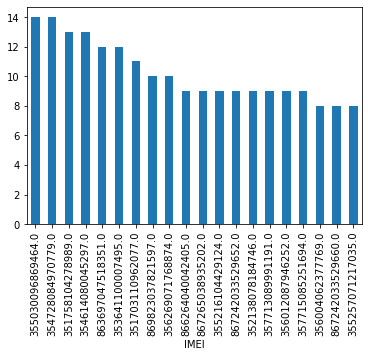

In [29]:
allData.groupby('IMEI').count()['IMSI'].sort_values(ascending=False).head(20).plot.bar()

In [23]:
%%time
def tiempoAvanceFilter(df, valuesList):
    """ Filters the df by the values on the TA column"""
    return df[df['TA'].isin(valuesList)]
tiempoAvanceFilter(allData, ["1","2","3"])

Wall time: 4.99 ms


,RAT,BL/WL,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,MODEL,LATTITUDE,LONGITUDE,NAME,NOTES,HITS,DATE_TIME
1089,3G,WL,EC-Claro(América Móvil)-01,587,7.400102e+14,3.546121e+14,F44BDA78,-93.0,3,50134,UNKNOWN,0,0,NaN,NaN,1,2020-01-01 01:41:41
1090,3G,WL,EC-Claro(América Móvil)-01,587,7.400102e+14,3.587931e+14,F044798E,-94.0,3,50134,UNKNOWN,0,0,NaN,NaN,1,2020-01-01 00:39:43
1091,3G,WL,EC-Claro(América Móvil)-01,587,7.400102e+14,3.526611e+14,F54AD920,-92.0,3,50134,UNKNOWN,0,0,NaN,NaN,1,2020-01-01 00:30:59
1092,3G,WL,EC-Claro(América Móvil)-01,587,7.400102e+14,3.537711e+14,F041E2C0,-98.0,3,32769,UNKNOWN,0,0,NaN,NaN,3,2020-01-01 01:42:15
1093,3G,WL,EC-Claro(América Móvil)-01,587,7.400102e+14,3.571401e+14,C5433C71,-92.0,3,50134,UNKNOWN,0,0,NaN,NaN,1,2020-01-01 00:24:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,4G,WL,EC-Movistar(Telefónica)-00,700,7.400002e+14,NaN,NaN,-110147.0,2,9616,UNKNOWN,0,0,NaN,NaN,3,2019-12-31 12:20:57
2200,4G,WL,EC-Movistar(Telefónica)-00,700,7.400001e+14,NaN,NaN,-115382.0,2,-1,UNKNOWN,0,0,NaN,NaN,1,2019-12-31 08:07:56
2201,4G,WL,EC-Movistar(Telefónica)-00,700,7.400051e+14,NaN,NaN,-109835.0,2,9616,UNKNOWN,0,0,NaN,NaN,1,2019-12-31 08:07:31
2202,4G,WL,EC-Movistar(Telefónica)-00,700,7.400002e+14,NaN,NaN,-107257.0,2,9616,UNKNOWN,0,0,NaN,NaN,1,2019-12-31 08:07:22


In [29]:
def filterByHitsGrouping(df: pd.DataFrame, columnToGroupBy: str='IMEI', hitsMin: int=0):
    # print(f"Hits by grouping {df.info()} column {columnToGroupBy}")
    return df.groupby(columnToGroupBy).filter(lambda x: x['HITS'].sum() >= hitsMin)
filterByHitsGrouping(allData, 'IMEI', 1)

,RAT,BL/WL,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,MODEL,LATTITUDE,LONGITUDE,NAME,NOTES,HITS,DATE_TIME
0,2G,WL,EC-Claro(América Móvil)-01,144,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,65534,UNKNOWN,0,0,NaN,NaN,1,2020-01-01 03:05:16
1,2G,WL,EC-Claro(América Móvil)-01,144,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,65534,UNKNOWN,0,0,NaN,NaN,1,2020-01-01 03:04:51
2,2G,WL,EC-Claro(América Móvil)-01,144,7.400102e+14,8.636970e+14,151D1A53,-66.0,0,50134,UNKNOWN,0,0,NaN,NaN,1,2020-01-01 02:55:06
3,2G,WL,EC-Claro(América Móvil)-01,144,7.400101e+14,3.570841e+14,97155956,-62.0,0,10228,UNKNOWN,0,0,NaN,NaN,1,2020-01-01 02:54:44
4,2G,WL,EC-Claro(América Móvil)-01,144,7.400102e+14,3.580991e+14,FFFFFFFF,-64.0,0,65534,UNKNOWN,0,0,NaN,NaN,1,2020-01-01 02:37:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,3G,WL,EC-Movistar(Telefónica)-00,4412,7.400002e+14,8.698230e+14,EC31AE50,-99.0,3,15251,UNKNOWN,0,0,NaN,NaN,9,2019-12-31 14:59:17
2175,3G,WL,EC-Movistar(Telefónica)-00,4412,7.400002e+14,3.536411e+14,F0315CF7,-64.0,3,40202,UNKNOWN,0,0,NaN,NaN,1,2019-12-31 08:05:25
2176,3G,WL,EC-Movistar(Telefónica)-00,4412,7.400051e+14,3.517041e+14,9805B8AD,-99.0,3,15251,UNKNOWN,0,0,NaN,NaN,6,2019-12-31 12:03:45
2177,3G,WL,EC-Movistar(Telefónica)-00,4412,7.400002e+14,3.590411e+14,E02A726E,-97.0,3,40202,UNKNOWN,0,0,NaN,NaN,2,2019-12-31 14:07:01


In [ ]:
# Iterate last lac

In [70]:
def msPowerRangeFilter(df, fromN, toN):
    """ Filters the df in the column MS POWER with the given boundaries"""
    return df[df['MS_POWER'].between(fromN, toN)]
msPowerRangeFilter(allData, -100, 60)

TypeError: '>=' not supported between instances of 'str' and 'int'

In [0]:
def lastLacRangeFilter(df, fromN, toN):
    """ Filters the df in the column LAST LAC within the given boundaries"""
    return df[df['LAST_LAC'].between(fromN, toN)]
lastLac(allData, -100, 60000)

In [0]:
def getHitsAmounForEmais(df, n=None):
    """ Gets the frecuency of each IMEI in the df and returns a n length series"""
    # return df.groupby('IMEI')['HITS'].sum().sort_values(ascending=False).head(n=n)
    return df.groupby('IMEI')['HITS'].transform(
        lambda x: sum(x)
    )
getFrecuencyForEmais(allData)

In [78]:
import hashlib
def getUniqueNameIdColumn(df: pd.DataFrame):
    """ Updates the NAME with a unique KEY FOR A imei group"""
    fn = lambda x: hashlib.md5(str(x).encode()).hexdigest()
    return df.groupby('IMEI')['IMEI'].transform(fn)
# Como asignarlo para que no de warning y SI lo pegue 
# df = df.assign(c=col.values) # assign values to column 'c'
df1 = getUniqueNameIdColumn(allData.loc[allData['IMEI'].notnull()])
df = allData.loc[allData['IMEI'].notnull()]
df.assign(test = df1)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME,test
0,2G,EC-Claro(América Móvil)-01,144,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,65534,NaN,1,2020-01-01 03:05:16,f2c32df94581d7c7ad60fd4d581b4531
1,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,65534,NaN,1,2020-01-01 03:04:51,2af54eb33eb0049a80f82ee93826cee0
2,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,8.636970e+14,151D1A53,-66.0,0,50134,NaN,1,2020-01-01 02:55:06,634f626b4d8d9122684165bac3b2dc16
3,2G,EC-Claro(América Móvil)-01,144,7.400101e+14,3.570841e+14,97155956,-62.0,0,10228,NaN,1,2020-01-01 02:54:44,24c7f4fe956e54719b3deea7ff7878ba
4,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.580991e+14,FFFFFFFF,-64.0,0,65534,NaN,1,2020-01-01 02:37:15,332c8325cdd994425399b26ed08a2561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,3G,EC-Movistar(Telefónica)-00,537,7.400001e+14,8.658420e+14,D51AC792,-102.0,2,15251,NaN,1,2020-01-02 10:04:21,4112d868c0e36bb5be4587c83d651260
977,3G,EC-Movistar(Telefónica)-00,4412,7.400051e+14,3.517041e+14,2AAC703D,-98.0,3,15251,NaN,3,2020-01-02 11:43:21,ed705ff8f2facf9f5b46afff6fc8e2bb
978,3G,EC-Movistar(Telefónica)-00,537,7.400102e+14,3.562691e+14,FE4571E7,-104.0,3,50134,NaN,1,2020-01-02 10:04:17,ceba4ffad4a2a0af7e3ac4ac3209993e
979,3G,EC-Movistar(Telefónica)-00,4412,7.400001e+14,8.636970e+14,0,-100.0,3,40202,NaN,2,2020-01-02 13:21:07,fc49fed725f3c318207562df44b9ae10


In [83]:
# Inplace replacement
import hashlib

def getUniqueNameIdColumn(dfEmaisOk: pd.DataFrame):
    """ Updates the NAME with a unique KEY for a EMAI groups and returns that new DataFrame"""
    fn = lambda x: hashlib.md5(str(x).encode()).hexdigest()[0:10]
    df1 = dfEmaisOk.groupby('IMEI')['IMEI'].transform(fn)
    return dfEmaisOk.assign(NAME=df1)
# Como asignarlo para que no de warning y SI lo pegue 
# df = df.assign(c=col.values) # assign values to column 'c'
df1 = getUniqueNameIdColumn(allData.loc[allData['IMEI'].notnull()])
df1

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
0,2G,EC-Claro(América Móvil)-01,144,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,65534,f2c32df945,1,2020-01-01 03:05:16
1,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,65534,2af54eb33e,1,2020-01-01 03:04:51
2,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,8.636970e+14,151D1A53,-66.0,0,50134,634f626b4d,1,2020-01-01 02:55:06
3,2G,EC-Claro(América Móvil)-01,144,7.400101e+14,3.570841e+14,97155956,-62.0,0,10228,24c7f4fe95,1,2020-01-01 02:54:44
4,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.580991e+14,FFFFFFFF,-64.0,0,65534,332c8325cd,1,2020-01-01 02:37:15
...,...,...,...,...,...,...,...,...,...,...,...,...
976,3G,EC-Movistar(Telefónica)-00,537,7.400001e+14,8.658420e+14,D51AC792,-102.0,2,15251,4112d868c0,1,2020-01-02 10:04:21
977,3G,EC-Movistar(Telefónica)-00,4412,7.400051e+14,3.517041e+14,2AAC703D,-98.0,3,15251,ed705ff8f2,3,2020-01-02 11:43:21
978,3G,EC-Movistar(Telefónica)-00,537,7.400102e+14,3.562691e+14,FE4571E7,-104.0,3,50134,ceba4ffad4,1,2020-01-02 10:04:17
979,3G,EC-Movistar(Telefónica)-00,4412,7.400001e+14,8.636970e+14,0,-100.0,3,40202,fc49fed725,2,2020-01-02 13:21:07


In [66]:
%%time
def filterDfByColumnValues(df, column: str, columnValues: list):
    """
    Groups the df by the column parameters and gets the groups in the columnValues list
    """
    groupedColumn = df.groupby(column)
    dfs = [groupedColumn.get_group(gn) for gn in columnValues]
    return pd.concat(dfs)
filterDfByColumnValues(allData,'RAT', ['2G'])

Wall time: 3.99 ms


,RAT,BL/WL,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,MODEL,LATTITUDE,LONGITUDE,NAME,NOTES,HITS,DATE_TIME
0,2G,WL,EC-Claro(América Móvil)-01,245.0,23.0,1.0,FFFFFFFF,-64.0,0.0,2,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-02 23:53:29
1,2G,WL,EC-Claro(América Móvil)-01,245.0,23.0,1.0,36129C46,-64.0,0.0,2,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-02 23:47:29
2,2G,WL,EC-Claro(América Móvil)-01,245.0,12.0,1.0,9B0D58C1,-65.0,0.0,2,NaN,NaN,NaN,NaN,NaN,12.0,2020-01-02 23:41:19
3,2G,WL,EC-Claro(América Móvil)-01,245.0,12.0,1.0,301038EE,-66.0,0.0,2,NaN,NaN,NaN,NaN,NaN,3.0,2020-01-02 23:27:23
4,2G,WL,EC-Claro(América Móvil)-01,245.0,1.0,2.0,870C5759,-66.0,0.0,2,NaN,NaN,NaN,NaN,NaN,4.0,2020-01-02 23:20:18
5,2G,WL,EC-Claro(América Móvil)-01,245.0,5.0,2.0,540C8DA9,-65.0,0.0,2,NaN,NaN,NaN,NaN,NaN,5.0,2020-01-02 23:19:17
6,2G,WL,EC-Claro(América Móvil)-01,245.0,6.0,22.0,FFFFFFFF,-63.0,0.0,3,NaN,NaN,NaN,NaN,NaN,2.0,2020-01-03 04:07:17
7,2G,WL,EC-Claro(América Móvil)-01,245.0,7.0,3.0,FFFFFFFF,-63.0,0.0,4,NaN,NaN,NaN,NaN,NaN,23.0,2020-01-02 23:27:27
8,2G,WL,EC-Claro(América Móvil)-01,245.0,8.0,3.0,1C19CFAB,-63.0,0.0,5,NaN,NaN,NaN,NaN,NaN,35.0,2020-01-02 20:25:19
9,2G,WL,EC-Movistar(Telefónica)-00,245.0,4.0,5.0,021F71EB,-65.0,0.0,3,NaN,NaN,NaN,NaN,NaN,3.0,2020-01-02 19:33:16


In [61]:
headerList = tuple(allData.columns.values)
headerList

('RAT',
 'OPERATOR',
 'CHANNEL',
 'IMSI',
 'IMEI',
 'TMSI',
 'MS_POWER',
 'TA',
 'LAST_LAC',
 'NAME',
 'HITS',
 'DATE_TIME')

In [29]:
for i,row in enumerate(allData.itertuples()):
    print("Raw raow ",row)
    r = []
    for i,columnName in enumerate(headerList):
        r.append(row._asdict()[str(columnName)])
    print(r)
    print("------------------------------------------------------------------------------\n\n")

, 1, Timestamp('2020-01-02 13:53:04')]
------------------------------------------------------------------------------


Raw raow  Pandas(Index=30, RAT='4G', OPERATOR='EC-Claro(América Móvil)-01', CHANNEL=925, IMSI=740010173847666.0, IMEI=nan, TMSI=nan, MS_POWER=-102.96, TA=2, LAST_LAC=60134, NAME=nan, HITS=1, DATE_TIME=Timestamp('2020-01-02 13:52:59'))
['4G', 'EC-Claro(América Móvil)-01', 925, 740010173847666.0, nan, nan, -102.96, 2, 60134, nan, 1, Timestamp('2020-01-02 13:52:59')]
------------------------------------------------------------------------------


Raw raow  Pandas(Index=31, RAT='4G', OPERATOR='EC-Claro(América Móvil)-01', CHANNEL=925, IMSI=740010178573355.0, IMEI=nan, TMSI=nan, MS_POWER=-101319.0, TA=2, LAST_LAC=-1, NAME=nan, HITS=34, DATE_TIME=Timestamp('2020-01-02 16:35:21'))
['4G', 'EC-Claro(América Móvil)-01', 925, 740010178573355.0, nan, nan, -101319.0, 2, -1, nan, 34, Timestamp('2020-01-02 16:35:21')]
-----------------------------------------------------------------

In [67]:
# Prueba
import numpy as np
pivotTable = pd.pivot_table(allData, values="HITS", index=['IMEI', 'IMSI'], aggfunc=np.sum)
pivotTable.to_excel("prueba_pivot.xlsx")

In [93]:
allData.head(2)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE-TIME
0,2G,EC-Movistar(Telefónica)-00,245.0,2.040433e+14,356612024675599,1F41825D,-72,0,15251.0,NaN,2.0,do. ene. 12 17:06:33 2020
1,2G,EC-Movistar(Telefónica)-00,245.0,2.040808e+14,353068098714504,FFFFFFFF,-79,0,15251.0,NaN,1.0,do. ene. 12 16:26:39 2020


In [68]:
def obtenerHitsEmai(df):
    # return  df.groupby('IMEI')['HITS'].agg(HITS= 'sum').sort_values(by="HITS", ascending=False)
    return  df.groupby('IMEI').agg(HITS=('HITS', 'sum')).sort_values(by="HITS", ascending=False)
obtenerHitsEmai(allData)

,HITS
IMEI,
2.0,799.000000
3.0,182.000000
4.0,93.000000
666.0,84.267081
6.0,68.000000
5.0,62.000000
1.0,37.000000
66.0,34.000000
7.0,11.000000


In [69]:
%%time
def getUniqueColumnValues(df, column):
    return df[column].unique()
getUniqueColumnValues(allData,'OPERATOR').tolist()

Wall time: 997 µs


['EC-Claro(América Móvil)-01',
 'EC-Movistar(Telefónica)-00',
 'EC-Movistar(Telefónica)-01']

In [70]:
%%timeit -n 100
def filterDfByEmai(df, imei):
    return df[df['IMEI']==float(imei)]
filterDfByEmai(allData2G, "868789022187230")

925 µs ± 172 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [71]:
def getDfImeisNulos(df:pd.DataFrame):
    return df[df['IMEI'].isnull()]
getDfImeisNulos(allData)

,RAT,BL/WL,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,MODEL,LATTITUDE,LONGITUDE,NAME,NOTES,HITS,DATE_TIME
45,4G,WL,EC-Claro(América Móvil)-01,925.0,1.0,NaN,0A1265AE,-113585.0,6.0,90,NaN,NaN,NaN,NaN,NaN,2.000000,2021-01-02 18:04:55
51,4G,WL,EC-Claro(América Móvil)-01,925.0,6666.0,NaN,0A1265AE,-113588.0,6.0,90,NaN,NaN,NaN,NaN,NaN,84.267081,2021-01-02 18:04:55


In [80]:
# NO, pruebas
def asignarIMEIS_(allDataP: pd.DataFrame, dfImeisFaltantes: pd.DataFrame):
    """ Assigns Emais for the columns where the emais is null based on the historical data"""
    def joinValues(values):
        # print(f"{type(values)}")
        return ','.join(map(str,values))
    def obtenerEmai(x: str):
        # X is the IMSI value
        rCoincide = allDataP[allDataP['IMSI'].isin(x.values)]['IMEI']
        imeis = joinValues(rCoincide[rCoincide.notnull()].unique())
        return imeis
    nuevosValores = dfImeisFaltantes.groupby('IMSI')['IMSI'].transform(obtenerEmai)
    # allDataP.loc[dfFalta.index, 'IMEI'] = nuevosValores
    return nuevosValores
dfFalta = getDfImeisNulos(allData)
# Asignar emais
asignarIMEIS_(allData, dfFalta)
# allData.loc[dfFalta.index, 'IMEI'] = asignarIMEIS_(allData, dfFalta)

Series([], Name: IMSI, dtype: float64)

In [153]:
getDfImeisNulos(allData)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
4640,3G,EC-Movistar(Telefónica)-00,512.0,7.400052e+14,NaN,D7309849,-104.00,3,32768.0,NaN,1.0,2020-01-12 13:01:37
7353,4G,EC-Movistar(Telefónica)-00,700.0,7.400001e+14,NaN,NaN,-116553.00,5,9616.0,NaN,3.0,2020-01-12 10:32:52
7354,4G,EC-Movistar(Telefónica)-00,700.0,7.400001e+14,NaN,NaN,-103819.00,4,9616.0,NaN,1.0,2020-01-12 10:32:06
7355,4G,EC-Movistar(Telefónica)-00,700.0,7.400001e+14,NaN,NaN,-114.60,4,9616.0,NaN,2.0,2020-01-12 10:32:35
7356,4G,EC-Movistar(Telefónica)-00,700.0,7.400001e+14,NaN,NaN,-112647.00,5,9616.0,NaN,1.0,2020-01-12 10:32:49
...,...,...,...,...,...,...,...,...,...,...,...,...
29803,4G,EC-Movistar(Telefónica)-00,700.0,7.400002e+14,NaN,NaN,-116632.00,7,9616.0,NaN,1.0,2020-01-15 07:23:01
29804,4G,EC-Movistar(Telefónica)-00,700.0,7.400051e+14,NaN,NaN,-109991.00,5,-1.0,NaN,1.0,2020-01-15 07:22:51
29805,4G,EC-Movistar(Telefónica)-00,700.0,7.400001e+14,NaN,NaN,-103272.00,4,9616.0,NaN,1.0,2020-01-15 07:22:40
29806,4G,EC-Movistar(Telefónica)-00,700.0,7.400002e+14,NaN,NaN,-103.35,4,9616.0,NaN,1.0,2020-01-15 07:22:30


In [75]:
# Assigns inplace
def asignarIMEIS(allDataP: pd.DataFrame, dfImeisFaltantes: pd.DataFrame):
    """ Assigns Emais for the columns where the emais is null based on the historical data"""
    def joinValues(values):
        # print(f"{type(values)}")
        return ','.join(map(str,values))
    def obtenerEmai(x: str):
        # X is the IMSI value
        rCoincide = allDataP[allDataP['IMSI'].isin(x.values)]['IMEI']
        imeis = joinValues(rCoincide[rCoincide.notnull()].unique())
        return imeis
    nuevosValores = dfImeisFaltantes.groupby('IMSI')['IMSI'].transform(obtenerEmai)
    allDataP.loc[dfFalta.index, 'IMEI'] = nuevosValores
    # Retorna serie con nuevos valores de IMEI separados por coma
    return allDataP
dfFalta = getDfImeisNulos(allData)
# Asignar emais
# allData.loc[dfFalta.index, 'IMEI'] = asignarEmais(allData, dfFalta)
allData

,RAT,BL/WL,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,MODEL,LATTITUDE,LONGITUDE,NAME,NOTES,HITS,DATE_TIME
0,2G,WL,EC-Claro(América Móvil)-01,245.0,23.0,1,FFFFFFFF,-64.0,0.0,2,NaN,NaN,NaN,NaN,NaN,1.000000,2020-01-02 23:53:29
1,2G,WL,EC-Claro(América Móvil)-01,245.0,23.0,1,36129C46,-64.0,0.0,2,NaN,NaN,NaN,NaN,NaN,1.000000,2020-01-02 23:47:29
2,2G,WL,EC-Claro(América Móvil)-01,245.0,12.0,1,9B0D58C1,-65.0,0.0,2,NaN,NaN,NaN,NaN,NaN,12.000000,2020-01-02 23:41:19
3,2G,WL,EC-Claro(América Móvil)-01,245.0,12.0,1,301038EE,-66.0,0.0,2,NaN,NaN,NaN,NaN,NaN,3.000000,2020-01-02 23:27:23
4,2G,WL,EC-Claro(América Móvil)-01,245.0,1.0,2,870C5759,-66.0,0.0,2,NaN,NaN,NaN,NaN,NaN,4.000000,2020-01-02 23:20:18
5,2G,WL,EC-Claro(América Móvil)-01,245.0,5.0,2,540C8DA9,-65.0,0.0,2,NaN,NaN,NaN,NaN,NaN,5.000000,2020-01-02 23:19:17
6,2G,WL,EC-Claro(América Móvil)-01,245.0,6.0,22,FFFFFFFF,-63.0,0.0,3,NaN,NaN,NaN,NaN,NaN,2.000000,2020-01-03 04:07:17
7,2G,WL,EC-Claro(América Móvil)-01,245.0,7.0,3,FFFFFFFF,-63.0,0.0,4,NaN,NaN,NaN,NaN,NaN,23.000000,2020-01-02 23:27:27
8,2G,WL,EC-Claro(América Móvil)-01,245.0,8.0,3,1C19CFAB,-63.0,0.0,5,NaN,NaN,NaN,NaN,NaN,35.000000,2020-01-02 20:25:19
9,2G,WL,EC-Movistar(Telefónica)-00,245.0,4.0,5,021F71EB,-65.0,0.0,3,NaN,NaN,NaN,NaN,NaN,3.000000,2020-01-02 19:33:16


In [74]:
# allData[allData['IMEI'].isnull()]
allData

,RAT,BL/WL,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,MODEL,LATTITUDE,LONGITUDE,NAME,NOTES,HITS,DATE_TIME
0,2G,WL,EC-Claro(América Móvil)-01,245.0,23.0,1.0,FFFFFFFF,-64.0,0.0,2,NaN,NaN,NaN,NaN,NaN,1.000000,2020-01-02 23:53:29
1,2G,WL,EC-Claro(América Móvil)-01,245.0,23.0,1.0,36129C46,-64.0,0.0,2,NaN,NaN,NaN,NaN,NaN,1.000000,2020-01-02 23:47:29
2,2G,WL,EC-Claro(América Móvil)-01,245.0,12.0,1.0,9B0D58C1,-65.0,0.0,2,NaN,NaN,NaN,NaN,NaN,12.000000,2020-01-02 23:41:19
3,2G,WL,EC-Claro(América Móvil)-01,245.0,12.0,1.0,301038EE,-66.0,0.0,2,NaN,NaN,NaN,NaN,NaN,3.000000,2020-01-02 23:27:23
4,2G,WL,EC-Claro(América Móvil)-01,245.0,1.0,2.0,870C5759,-66.0,0.0,2,NaN,NaN,NaN,NaN,NaN,4.000000,2020-01-02 23:20:18
5,2G,WL,EC-Claro(América Móvil)-01,245.0,5.0,2.0,540C8DA9,-65.0,0.0,2,NaN,NaN,NaN,NaN,NaN,5.000000,2020-01-02 23:19:17
6,2G,WL,EC-Claro(América Móvil)-01,245.0,6.0,22.0,FFFFFFFF,-63.0,0.0,3,NaN,NaN,NaN,NaN,NaN,2.000000,2020-01-03 04:07:17
7,2G,WL,EC-Claro(América Móvil)-01,245.0,7.0,3.0,FFFFFFFF,-63.0,0.0,4,NaN,NaN,NaN,NaN,NaN,23.000000,2020-01-02 23:27:27
8,2G,WL,EC-Claro(América Móvil)-01,245.0,8.0,3.0,1C19CFAB,-63.0,0.0,5,NaN,NaN,NaN,NaN,NaN,35.000000,2020-01-02 20:25:19
9,2G,WL,EC-Movistar(Telefónica)-00,245.0,4.0,5.0,021F71EB,-65.0,0.0,3,NaN,NaN,NaN,NaN,NaN,3.000000,2020-01-02 19:33:16


In [82]:
# Ref
import hashlib

def getUniqueNameIdColumn(dfEmaisOk: pd.DataFrame):
    """ Updates the NAME with a unique KEY for a EMAI groups and returns that new DataFrame"""
    fn = lambda x: hashlib.md5(str(x).encode()).hexdigest()[0:10]
    df1 = dfEmaisOk.groupby('IMEI')['IMEI'].transform(fn)
    return dfEmaisOk.assign(NAME=df1)
# Como asignarlo para que no de warning y SI lo pegue 
# df = df.assign(c=col.values) # assign values to column 'c'
df1 = getUniqueNameIdColumn(allData.loc[allData['IMEI'].notnull()])
df1

,RAT,BL/WL,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,MODEL,LATTITUDE,LONGITUDE,NAME,NOTES,HITS,DATE_TIME
0,2G,WL,EC-Claro(América Móvil)-01,245.0,23.0,1,FFFFFFFF,-64.0,0.0,2,NaN,NaN,NaN,cccd88ed25,NaN,1.000000,2020-01-02 23:53:29
1,2G,WL,EC-Claro(América Móvil)-01,245.0,23.0,1,36129C46,-64.0,0.0,2,NaN,NaN,NaN,cccd88ed25,NaN,1.000000,2020-01-02 23:47:29
2,2G,WL,EC-Claro(América Móvil)-01,245.0,12.0,1,9B0D58C1,-65.0,0.0,2,NaN,NaN,NaN,cccd88ed25,NaN,12.000000,2020-01-02 23:41:19
3,2G,WL,EC-Claro(América Móvil)-01,245.0,12.0,1,301038EE,-66.0,0.0,2,NaN,NaN,NaN,cccd88ed25,NaN,3.000000,2020-01-02 23:27:23
4,2G,WL,EC-Claro(América Móvil)-01,245.0,1.0,2,870C5759,-66.0,0.0,2,NaN,NaN,NaN,c7923f6de2,NaN,4.000000,2020-01-02 23:20:18
5,2G,WL,EC-Claro(América Móvil)-01,245.0,5.0,2,540C8DA9,-65.0,0.0,2,NaN,NaN,NaN,c7923f6de2,NaN,5.000000,2020-01-02 23:19:17
6,2G,WL,EC-Claro(América Móvil)-01,245.0,6.0,22,FFFFFFFF,-63.0,0.0,3,NaN,NaN,NaN,1a8ff68824,NaN,2.000000,2020-01-03 04:07:17
7,2G,WL,EC-Claro(América Móvil)-01,245.0,7.0,3,FFFFFFFF,-63.0,0.0,4,NaN,NaN,NaN,21e74120f3,NaN,23.000000,2020-01-02 23:27:27
8,2G,WL,EC-Claro(América Móvil)-01,245.0,8.0,3,1C19CFAB,-63.0,0.0,5,NaN,NaN,NaN,21e74120f3,NaN,35.000000,2020-01-02 20:25:19
9,2G,WL,EC-Movistar(Telefónica)-00,245.0,4.0,5,021F71EB,-65.0,0.0,3,NaN,NaN,NaN,0a8929aea8,NaN,3.000000,2020-01-02 19:33:16


In [33]:
allData.head(2)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE-TIME
0,2G,EC-Claro(América Móvil)-01,144,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,65534,NaN,1,2020-01-01 03:05:16
1,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,65534,NaN,1,2020-01-01 03:04:51


In [160]:
%%time
def getGroupedByEmais(df: pd.DataFrame):
    # Returns a df with grouped and aggreagated values 
    def joinValues(series):
        return ','.join(map(str,series[series.notnull()].unique()))
    groupedDf = df.groupby('IMEI').agg({
        'IMEI':[joinValues],
        'RAT':[joinValues],
        'OPERATOR':[joinValues],
        'IMSI':[joinValues],
        'MS_POWER':[joinValues],
        'TA':[joinValues],
        'LAST_LAC':[joinValues],
        'HITS':['sum'],
        'DATE_TIME':[joinValues],
    })
    return groupedDf
getGroupedByEmais(allData)

Wall time: 1min 12s


,IMEI,RAT,OPERATOR,IMSI,MS_POWER,TA,LAST_LAC,HITS,DATE_TIME
,joinValues,joinValues,joinValues,joinValues,joinValues,joinValues,joinValues,sum,joinValues
IMEI,,,,,,,,,
10373000452820.0,10373000452820.0,2G,EC-Claro(América Móvil)-01,740010181070661.0,"-96.0,-89.0","0,1.0","10227.0,65534.0",3.0,"2020-01-13T20:28:18.000000000,2020-01-15T12:15..."
10657001511596.0,10657001511596.0,2G,EC-Claro(América Móvil)-01,740010116530825.0,-74.0,0.0,65534.0,3.0,2020-01-14T11:42:20.000000000
10713000326351.0,10713000326351.0,2G,EC-Claro(América Móvil)-01,740010111363389.0,-92.0,0.0,65534.0,33.0,2020-01-15T15:47:33.000000000
10713000364535,10713000364535,2G,EC-Claro(América Móvil)-01,740010112058005.0,-9.0,0.0,65534.0,2.0,2020-01-12T18:39:55.000000000
10713000623005.0,10713000623005.0,2G,EC-Claro(América Móvil)-01,740010127780962.0,-80.0,0.0,65534.0,24.0,2020-01-15T15:27:51.000000000
...,...,...,...,...,...,...,...,...,...
869971040811566,869971040811566,4G,EC-Claro(América Móvil)-01,740010164351293.0,-113428.0,2.0,-1.0,1.0,2020-01-12T20:06:16.000000000
869971043353632,869971043353632,4G,EC-Claro(América Móvil)-01,740010181892405.0,"-114444.0,-119913.0,-113741.0","2.0,4.0",60134.0,4.0,"2020-01-12T20:51:35.000000000,2020-01-14T12:31..."


In [56]:
def getGroupedByEmais(df: pd.DataFrame):
    # Returns a df with grouped and aggregated values 
    def joinValues(series):
        return ','.join(map(str,series[series.notnull()].unique()))
    groupedDf = df.groupby('IMEI').agg(
        IMEI=pd.NamedAgg(column='IMEI', aggfunc=joinValues), 
        RAT=pd.NamedAgg(column='RAT', aggfunc=joinValues), 
        OPERATOR=pd.NamedAgg(column='OPERATOR', aggfunc=joinValues), 
        CHANNEL=pd.NamedAgg(column='CHANNEL', aggfunc=joinValues), 
        IMSI=pd.NamedAgg(column='IMSI', aggfunc=joinValues), 
        TMSI=pd.NamedAgg(column='TMSI', aggfunc=joinValues), 
        MS_POWER=pd.NamedAgg(column='MS_POWER', aggfunc=joinValues), 
        TA=pd.NamedAgg(column='TA', aggfunc=joinValues), 
        LAST_LAC=pd.NamedAgg(column='LAST_LAC', aggfunc=joinValues), 
        NAME=pd.NamedAgg(column='NAME', aggfunc=joinValues), 
        HITS=pd.NamedAgg(column='HITS', aggfunc='sum'), 
        DATE_TIME=pd.NamedAgg(column='DATE_TIME', aggfunc=joinValues), 
    )
    return groupedDf
temp = getGroupedByEmais(allData).head(100)
temp

,IMEI,RAT,OPERATOR,CHANNEL,IMSI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
IMEI,,,,,,,,,,,,
1.032001e+13,10320005238092.0,2G,EC-Claro(América Móvil)-01,140.0,740010180578000.0,FFFFFFFF,-5.0,0,65534.0,,1.0,2020-01-13T16:51:03.000000000
1.032001e+13,10320006102966,2G,EC-Claro(América Móvil)-01,136.0,740010182207322.0,2B13C03E,-79.0,0.0,10228.0,,1.0,2020-01-12T18:50:11.000000000
1.037200e+13,10372002480979,2G,EC-Claro(América Móvil)-01,136.0,740010184917855.0,FFFFFFFF,-91.0,0.0,65534.0,,1.0,2020-01-12T18:50:39.000000000
1.037300e+13,10373000452820.0,2G,EC-Claro(América Móvil)-01,140.0,740010181070661.0,FFFFFFFF,"-96.0,-89.0","0,1.0","10227.0,65534.0",,3.0,"2020-01-13T20:28:18.000000000,2020-01-15T12:15..."
1.056200e+13,10562002167325.0,2G,EC-Claro(América Móvil)-01,140.0,740010181532963.0,9F163B5E,-72.0,0.0,10289.0,,1.0,2020-01-15T16:59:42.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1.267401e+13,12674005791262.0,2G,EC-Claro(América Móvil)-01,143.0,740010176005934.0,5C162226,-74.0,0,10228.0,,1.0,2020-01-13T07:51:56.000000000
1.268101e+13,12681009828966.0,2G,EC-Claro(América Móvil)-01,140.0,740010182189716.0,360D6551,-70.0,0.0,10228.0,,1.0,2020-01-15T12:16:58.000000000
1.271901e+13,12719006273958.0,2G,EC-Claro(América Móvil)-01,140.0,740010143140390.0,6409E719,-74.0,0,10228.0,,1.0,2020-01-13T16:42:39.000000000


In [55]:
def getGroupedByEmaisHorario(df: pd.DataFrame):
    # Returns a df with grouped and aggregated values 
    def joinValues(series):
        return ','.join(map(str,series[series.notnull()].unique()))
    groupedDf = df.groupby('IMEI', as_index=True).agg(
        IMSIS=pd.NamedAgg(column='IMSI', aggfunc=joinValues), 
        HITS=pd.NamedAgg(column='HITS', aggfunc='sum'), 
        DATE_TIME=pd.NamedAgg(column='DATE_TIME', aggfunc=joinValues)
    )
    return groupedDf
temp = getGroupedByEmaisHorario(allData.head(100))

# Pruebas
def getGroupedByEmaisHorario_(df: pd.DataFrame):
    # Returns a df with grouped and aggregated values 
    def joinValues(series):
        return ','.join(map(str,series[series.notnull()].unique()))
    groupedDf = df.groupby('IMEI', as_index=True).agg(
        HITS=pd.NamedAgg(column='HITS', aggfunc='sum'), 
        DATE_TIME=pd.NamedAgg(column='DATE_TIME', aggfunc=joinValues)
    )
    return groupedDf
getGroupedByEmaisHorario_(temp)

,HITS,DATE_TIME
IMEI,,
11164004952496,1.0,2020-01-12T17:02:37.000000000
14050004821962,1.0,2020-01-12T17:55:16.000000000
351934055759703,1.0,2020-01-12T12:20:58.000000000
351967050576854,1.0,2020-01-12T17:07:53.000000000
352093089596273,1.0,2020-01-12T17:22:03.000000000
...,...,...
867162027500750,1.0,2020-01-12T16:44:29.000000000
868789020230495,1.0,2020-01-12T16:47:01.000000000
868789022187230,24.0,2020-01-12T16:34:41.000000000


In [15]:
def filterByHitsAmount(df: pd.DataFrame, amount: int):
    return df[df['HITS']>=amount]
filterByHitsAmount(allData, 10)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
60,2G,EC-Claro(América Móvil)-01,144,7.400101e+14,3.525990e+14,FFFFFFFF,-62.0,0,65534,NaN,17,2019-12-31 20:07:50
117,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.516281e+14,FFFFFFFF,-61.0,0,65534,NaN,25,2019-12-31 19:19:53
222,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.548471e+14,FFFFFFFF,-65.0,0,10228,NaN,19,2019-12-31 18:47:25
376,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.576551e+14,FFFFFFFF,-64.0,0,65534,NaN,25,2019-12-31 15:44:41
478,2G,EC-Claro(América Móvil)-01,144,7.400101e+14,3.525990e+14,FFFFFFFF,-66.0,0,65534,NaN,55,2019-12-31 16:16:28
...,...,...,...,...,...,...,...,...,...,...,...,...
32,4G,EC-Claro(América Móvil)-01,925,7.400102e+14,NaN,NaN,-101475.0,2,60136,NaN,25,2020-01-02 16:40:40
35,4G,EC-Claro(América Móvil)-01,925,7.400102e+14,NaN,NaN,-104757.0,2,60134,NaN,11,2020-01-02 17:39:31
48,4G,EC-Claro(América Móvil)-01,2250,7.400102e+14,NaN,NaN,-953034.0,2,60134,NaN,10,2020-01-02 09:00:21
67,4G,EC-Movistar(Telefónica)-00,700,7.400001e+14,NaN,NaN,-103116.0,2,9616,NaN,15,2020-01-02 13:49:05


In [30]:
def lastLacFrecuencia(df: pd.DataFrame):
    groupedDf = df.groupby('LAST_LAC')['LAST_LAC'].agg(FRECUENCIA=pd.NamedAgg(column='LAST_LAC', aggfunc='size'))
    groupedDf['LAST_LAC'] = groupedDf.index
    groupedDf = groupedDf[['LAST_LAC', 'FRECUENCIA']]
    return groupedDf.sort_values(ascending=False, by='FRECUENCIA')
lastLacDf = lastLacFrecuencia(allData)
lastLacDf

,LAST_LAC,FRECUENCIA
LAST_LAC,,
15251,15251,493
50134,50134,431
10228,10228,373
32769,32769,270
40202,40202,211
65534,65534,194
32768,32768,99
10294,10294,55
10227,10227,19


In [220]:
# Iterarete lastLastSer
headerList = tuple(lastLacDf.columns.values)
headerList

('FRECUENCIA',)

In [33]:
def lastLacFrecuenciaSeries(df: pd.DataFrame):
    groupedDf = df.groupby('LAST_LAC').size().sort_values(ascending=False)
    return groupedDf
# lastLacFrecuencia(allData).sort_values(ascending=False).plot(kind="bar")
lastLastSer = lastLacFrecuencia(allData)
lastLastSer

LAST_LAC
-1          5
 9616       8
 10227     19
 10228    373
 10294     55
 15251    493
 32768     99
 32769    270
 40111      1
 40202    211
 40204      1
 50110     15
 50132      6
 50134    431
 50136      2
 50142      1
 50200      1
 50404      7
 60134     12
 65534    194
dtype: int64

In [34]:
# Iterarete lastLastSer
for index, value in lastLastSer.iteritems():
    print(f"i {index}:{value}")

i -1:5
i 9616:8
i 10227:19
i 10228:373
i 10294:55
i 15251:493
i 32768:99
i 32769:270
i 40111:1
i 40202:211
i 40204:1
i 50110:15
i 50132:6
i 50134:431
i 50136:2
i 50142:1
i 50200:1
i 50404:7
i 60134:12
i 65534:194


In [21]:
allData.groupby('LAST_LAC').size()

LAST_LAC
-1         17
 0          1
 9616      19
 10227     31
 10228    547
 10294     70
 15251    621
 32768    170
 32769    533
 40111      1
 40202    350
 40204      1
 50110     37
 50132      8
 50134    687
 50136     10
 50142      1
 50200      1
 50404     45
 60134     58
 60136      5
 65534    414
dtype: int64

In [233]:
def filtroLastLacValor(df: pd.DataFrame, value: str=None):
    return df[df['LAST_LAC']==float(value)] if value is not None else df
filtroLastLacValor(allData, None)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
0,2G,EC-Movistar(Telefónica)-00,245.0,2.040433e+14,356612024675599,1F41825D,-72,0,15251.0,NaN,2.0,2020-01-12 17:06:33
1,2G,EC-Movistar(Telefónica)-00,245.0,2.040808e+14,353068098714504,FFFFFFFF,-79,0,15251.0,NaN,1.0,2020-01-12 16:26:39
2,2G,EC-Claro(América Móvil)-01,136.0,2.140329e+14,357955087983593,700A80E9,-88,0,50134.0,NaN,1.0,2020-01-12 18:54:47
4,2G,EC-Movistar(Telefónica)-00,245.0,2.140606e+14,358794102465313,FFFFFFFF,-83,0,65534.0,NaN,1.0,2020-01-12 11:36:16
5,2G,EC-Movistar(Telefónica)-00,245.0,2.140742e+14,868789022187230,FFFFFFFF,-64,0,65534.0,NaN,24.0,2020-01-12 16:34:41
...,...,...,...,...,...,...,...,...,...,...,...,...
42729,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.67265e+14,8C6CB575,-71,0,15251.0,NaN,1.0,2020-01-15 07:20:28
42730,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.65464e+14,87D32415,-76,0,15251.0,NaN,1.0,2020-01-15 07:20:27
42731,2G,EC-Movistar(Telefónica)-00,245.0,7.400051e+14,8.63561e+14,8C5FC27D,-80,0,15251.0,NaN,1.0,2020-01-15 07:20:27
42732,2G,EC-Movistar(Telefónica)-00,245.0,7.400102e+14,3.55216e+14,BE0DC509,-63,0,10228.0,NaN,1.0,2020-01-15 07:20:26


In [189]:
def filtroHoras(df: pd.DataFrame, fromTime, toTime):
    return df[(df['DATE_TIME'].dt.hour >= fromTime) & (df['DATE_TIME'].dt.hour < toTime)]
filtroHoras(allData, 6, 12)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
4,2G,EC-Movistar(Telefónica)-00,245.0,2.140606e+14,358794102465313,FFFFFFFF,-83,0,65534.0,NaN,1.0,2020-01-12 11:36:16
20,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,357262008388071,23C32D25,-78,0,15251.0,NaN,2.0,2020-01-12 11:30:36
23,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,357262008343399,FFFFFFFF,-83,0,65534.0,NaN,7.0,2020-01-12 11:38:55
35,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,358484042516777,24C0D055,-62,0,15251.0,NaN,3.0,2020-01-12 11:48:09
43,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,865485040150234,24322700000,-73,0,15251.0,NaN,1.0,2020-01-12 11:27:09
...,...,...,...,...,...,...,...,...,...,...,...,...
42729,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.67265e+14,8C6CB575,-71,0,15251.0,NaN,1.0,2020-01-15 07:20:28
42730,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.65464e+14,87D32415,-76,0,15251.0,NaN,1.0,2020-01-15 07:20:27
42731,2G,EC-Movistar(Telefónica)-00,245.0,7.400051e+14,8.63561e+14,8C5FC27D,-80,0,15251.0,NaN,1.0,2020-01-15 07:20:27
42732,2G,EC-Movistar(Telefónica)-00,245.0,7.400102e+14,3.55216e+14,BE0DC509,-63,0,10228.0,NaN,1.0,2020-01-15 07:20:26


In [313]:
def filtroDatetimes(df: pd.DataFrame, fromDate, toDate):
    return df.loc[(df['DATE_TIME'] >= fromDate)&(df['DATE_TIME'] <= toDate)]
filtroDatetimes(allData, pd.to_datetime('2020-01-12 11:48:09'),pd.to_datetime('2021-01-12 11:48:09'))

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
0,2G,EC-Movistar(Telefónica)-00,245.0,2.040433e+14,356612024675599,1F41825D,-72,0,15251.0,NaN,2.0,2020-01-12 17:06:33
1,2G,EC-Movistar(Telefónica)-00,245.0,2.040808e+14,353068098714504,FFFFFFFF,-79,0,15251.0,NaN,1.0,2020-01-12 16:26:39
2,2G,EC-Claro(América Móvil)-01,136.0,2.140329e+14,357955087983593,700A80E9,-88,0,50134.0,NaN,1.0,2020-01-12 18:54:47
5,2G,EC-Movistar(Telefónica)-00,245.0,2.140742e+14,868789022187230,FFFFFFFF,-64,0,65534.0,NaN,24.0,2020-01-12 16:34:41
8,2G,EC-Movistar(Telefónica)-00,245.0,2.140743e+14,352093089596273,1D759CCD,-83,0,15251.0,NaN,1.0,2020-01-12 17:22:03
...,...,...,...,...,...,...,...,...,...,...,...,...
42729,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.67265e+14,8C6CB575,-71,0,15251.0,NaN,1.0,2020-01-15 07:20:28
42730,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.65464e+14,87D32415,-76,0,15251.0,NaN,1.0,2020-01-15 07:20:27
42731,2G,EC-Movistar(Telefónica)-00,245.0,7.400051e+14,8.63561e+14,8C5FC27D,-80,0,15251.0,NaN,1.0,2020-01-15 07:20:27
42732,2G,EC-Movistar(Telefónica)-00,245.0,7.400102e+14,3.55216e+14,BE0DC509,-63,0,10228.0,NaN,1.0,2020-01-15 07:20:26


In [26]:
allData[allData['DATE_TIME'].isnull()]

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
186,2G,EC-Claro(América Móvil)-01,140.0,7.400102e+14,1.405e+13,14253007522278,NaN,-82,0.0,NaN,NaN,NaT
3204,3G,EC-Movistar(Telefónica)-00,512.0,7.400102e+14,3.53415e+14,867265033931487,NaN,-110,3.0,NaN,NaN,NaT
4515,2G,EC-Movistar(Telefónica)-00,245.0,7.400202e+14,3.54452e+14,864893033923536,8.648930e+14,FFFFFFFF,-85.0,0.0,NaN,NaT
4516,2G,EC-Claro(América Móvil)-01,140.0,7.400202e+14,3.54452e+14,864893033923536,NaN,-76,0.0,NaN,NaN,NaT
7296,2G,EC-Claro(América Móvil)-01,140.0,7.400102e+14,3.56812e+14,356813071928978,NaN,-84,0.0,NaN,NaN,NaT
7299,3G,EC-Movistar(Telefónica)-00,4412.0,7.400102e+14,3.56812e+14,356813071988956,NaN,-105,3.0,NaN,NaN,NaT
9852,3G,EC-Movistar(Telefónica)-00,512.0,7.400202e+14,3.58517e+14,357185053125140,NaN,-111,3.0,NaN,NaN,NaT
11518,3G,EC-Movistar(Telefónica)-00,512.0,7.400102e+14,7.4e+14,356812071988958,NaN,-111,3.0,NaN,NaN,NaT
11519,3G,EC-Movistar(Telefónica)-00,512.0,7.400002e+14,7.4e+14,861586044319248,0.000000e+00,-107,3.0,NaN,NaN,NaT
11520,3G,EC-Movistar(Telefónica)-00,512.0,7.400202e+14,7.4e+14,865464040245559,0.000000e+00,-107,3.0,NaN,NaN,NaT


In [41]:
def isFloat(strNumber: str):
    try:
        float(strNumber)
        return True
    except ValueError as ve:
        return False

def hitsByDate(df: pd.DataFrame):
    grouped = df.reset_index().groupby(pd.Grouper(key='DATE_TIME', freq='D'))['HITS'].apply(sum)
    print(f"{type(grouped)}")
    grouped.sort_values(inplace=True)
    grouped.rename_axis('DATE', inplace=True)
    return grouped
# hitsByDate(allData).plot()
hitsByDate(allData).index.to_pydatetime()

ValueError: Length of passed values is 5, index implies 6

In [62]:
def hitsByDate(df: pd.DataFrame):
    dfT = df[df['DATE_TIME'].notnull()]
    return dfT.set_index('DATE_TIME').groupby(pd.Grouper(freq='D'))['HITS'].apply(sum)
hitsByDate(allData.reset_index(drop=True)).index.date

array([datetime.date(2020, 1, 12), datetime.date(2020, 1, 13),
       datetime.date(2020, 1, 14), datetime.date(2020, 1, 15),
       datetime.date(2020, 1, 16)], dtype=object)

In [60]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42711 entries, 0 to 13914
Data columns (total 12 columns):
RAT          42711 non-null object
OPERATOR     42711 non-null object
CHANNEL      42711 non-null float64
IMSI         42546 non-null float64
IMEI         40032 non-null object
TMSI         40035 non-null object
MS_POWER     42684 non-null float64
TA           42711 non-null object
LAST_LAC     42711 non-null float64
NAME         3 non-null float64
HITS         42678 non-null float64
DATE_TIME    42678 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 5.5+ MB
